### Loss function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Function 1: Non drivable proximity

In [2]:
def find_nearest_white(img, target):
    nonzero = cv2.findNonZero(img)
    distances = np.sqrt((nonzero[:,:,0] - TARGET[0]) ** 2 + (nonzero[:,:,1] - TARGET[1]) ** 2)
    nearest_index = np.argmin(distances)
    return nonzero[nearest_index]

In [4]:
import cv2
import numpy as np

# Create a test image
img = np.zeros((1024,1024), np.uint8)

# Fill it with some white pixels
img[10,10] = 255
img[20,1000] = 255
img[:,800:] = 255


TARGET = (255,255)


print(find_nearest_white(img, TARGET))

[[10 10]]


In [6]:
img.shape

(1024, 1024)

In [6]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, dtype=np.float32)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-((x-x0)**2 + (y-y0)**2) / fwhm**2)



In [7]:
g = makeGaussian(64,3,(15,15))

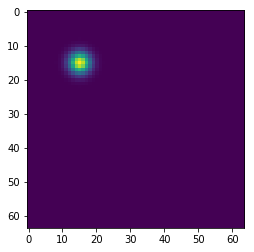

In [8]:
plt.imshow(g)

In [ ]:
samples = multivariate_normal([-0.5, -0.5], [[1, 0],[0, 1]], 1000)
plot(samples[:, 0], samples[:, 1], '.')

samples = multivariate_normal([0.5, 0.5], [[0.1, 0.5],[0.5, 0.6]], 1000)
plot(samples[:, 0], samples[:, 1], '.')

In [17]:
import numpy as np

# define normalized 2D gaussian
def gaus2d(x=0, y=0, mx=0, my=0, sx=6, sy=3):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(-64, 64)
y = np.linspace(-64, 64)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
z = gaus2d(x, y)




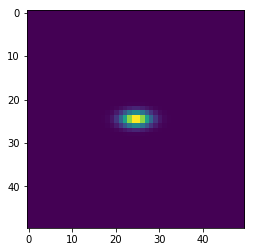

In [18]:
plt.imshow(z)

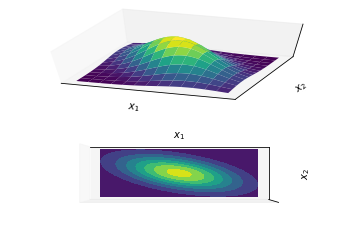

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()

In [21]:
Z.shape

(40, 40)

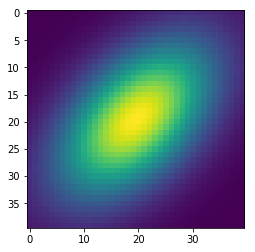

In [22]:
plt.imshow(Z)